In [1]:
%matplotlib inline
import networkx as nx
import json
from IPython.display import HTML
from networkx.algorithms import community
import community
import matplotlib.pyplot as plt

graphsize = 250
nodes = {}
links = {}
Graph = nx.barabasi_albert_graph(graphsize, 4)
#partition = community.k_clique_communities(Graph, 5)
dc = nx.degree_centrality(Graph)
j = "" # JSON object
j = j + "{"    
j = j + """\t"nodes": ["""

for n in nx.nodes(Graph):
    nodes[n] = {}
    nodes[n]['name'] = n
    #nodes[n]['group'] = partition[n]
    nodes[n]['dc'] = dc[n]
for n in nodes:
    j = j + str(json.dumps(nodes[n])) + ",\n"
j = j[:-2]
j = j + "\t],\n"
j = j + """\t"links":[\n"""
for link in nx.edges(Graph):
    links[str(link)] = {}
    links[str(link)]['source'] = link[0]
    links[str(link)]['target'] = link[1]
for l in links:
    j = j + str(json.dumps(links[l])) + ",\n"
j = j[:-2]
j = j + "\t]\n"
j = j + "}"

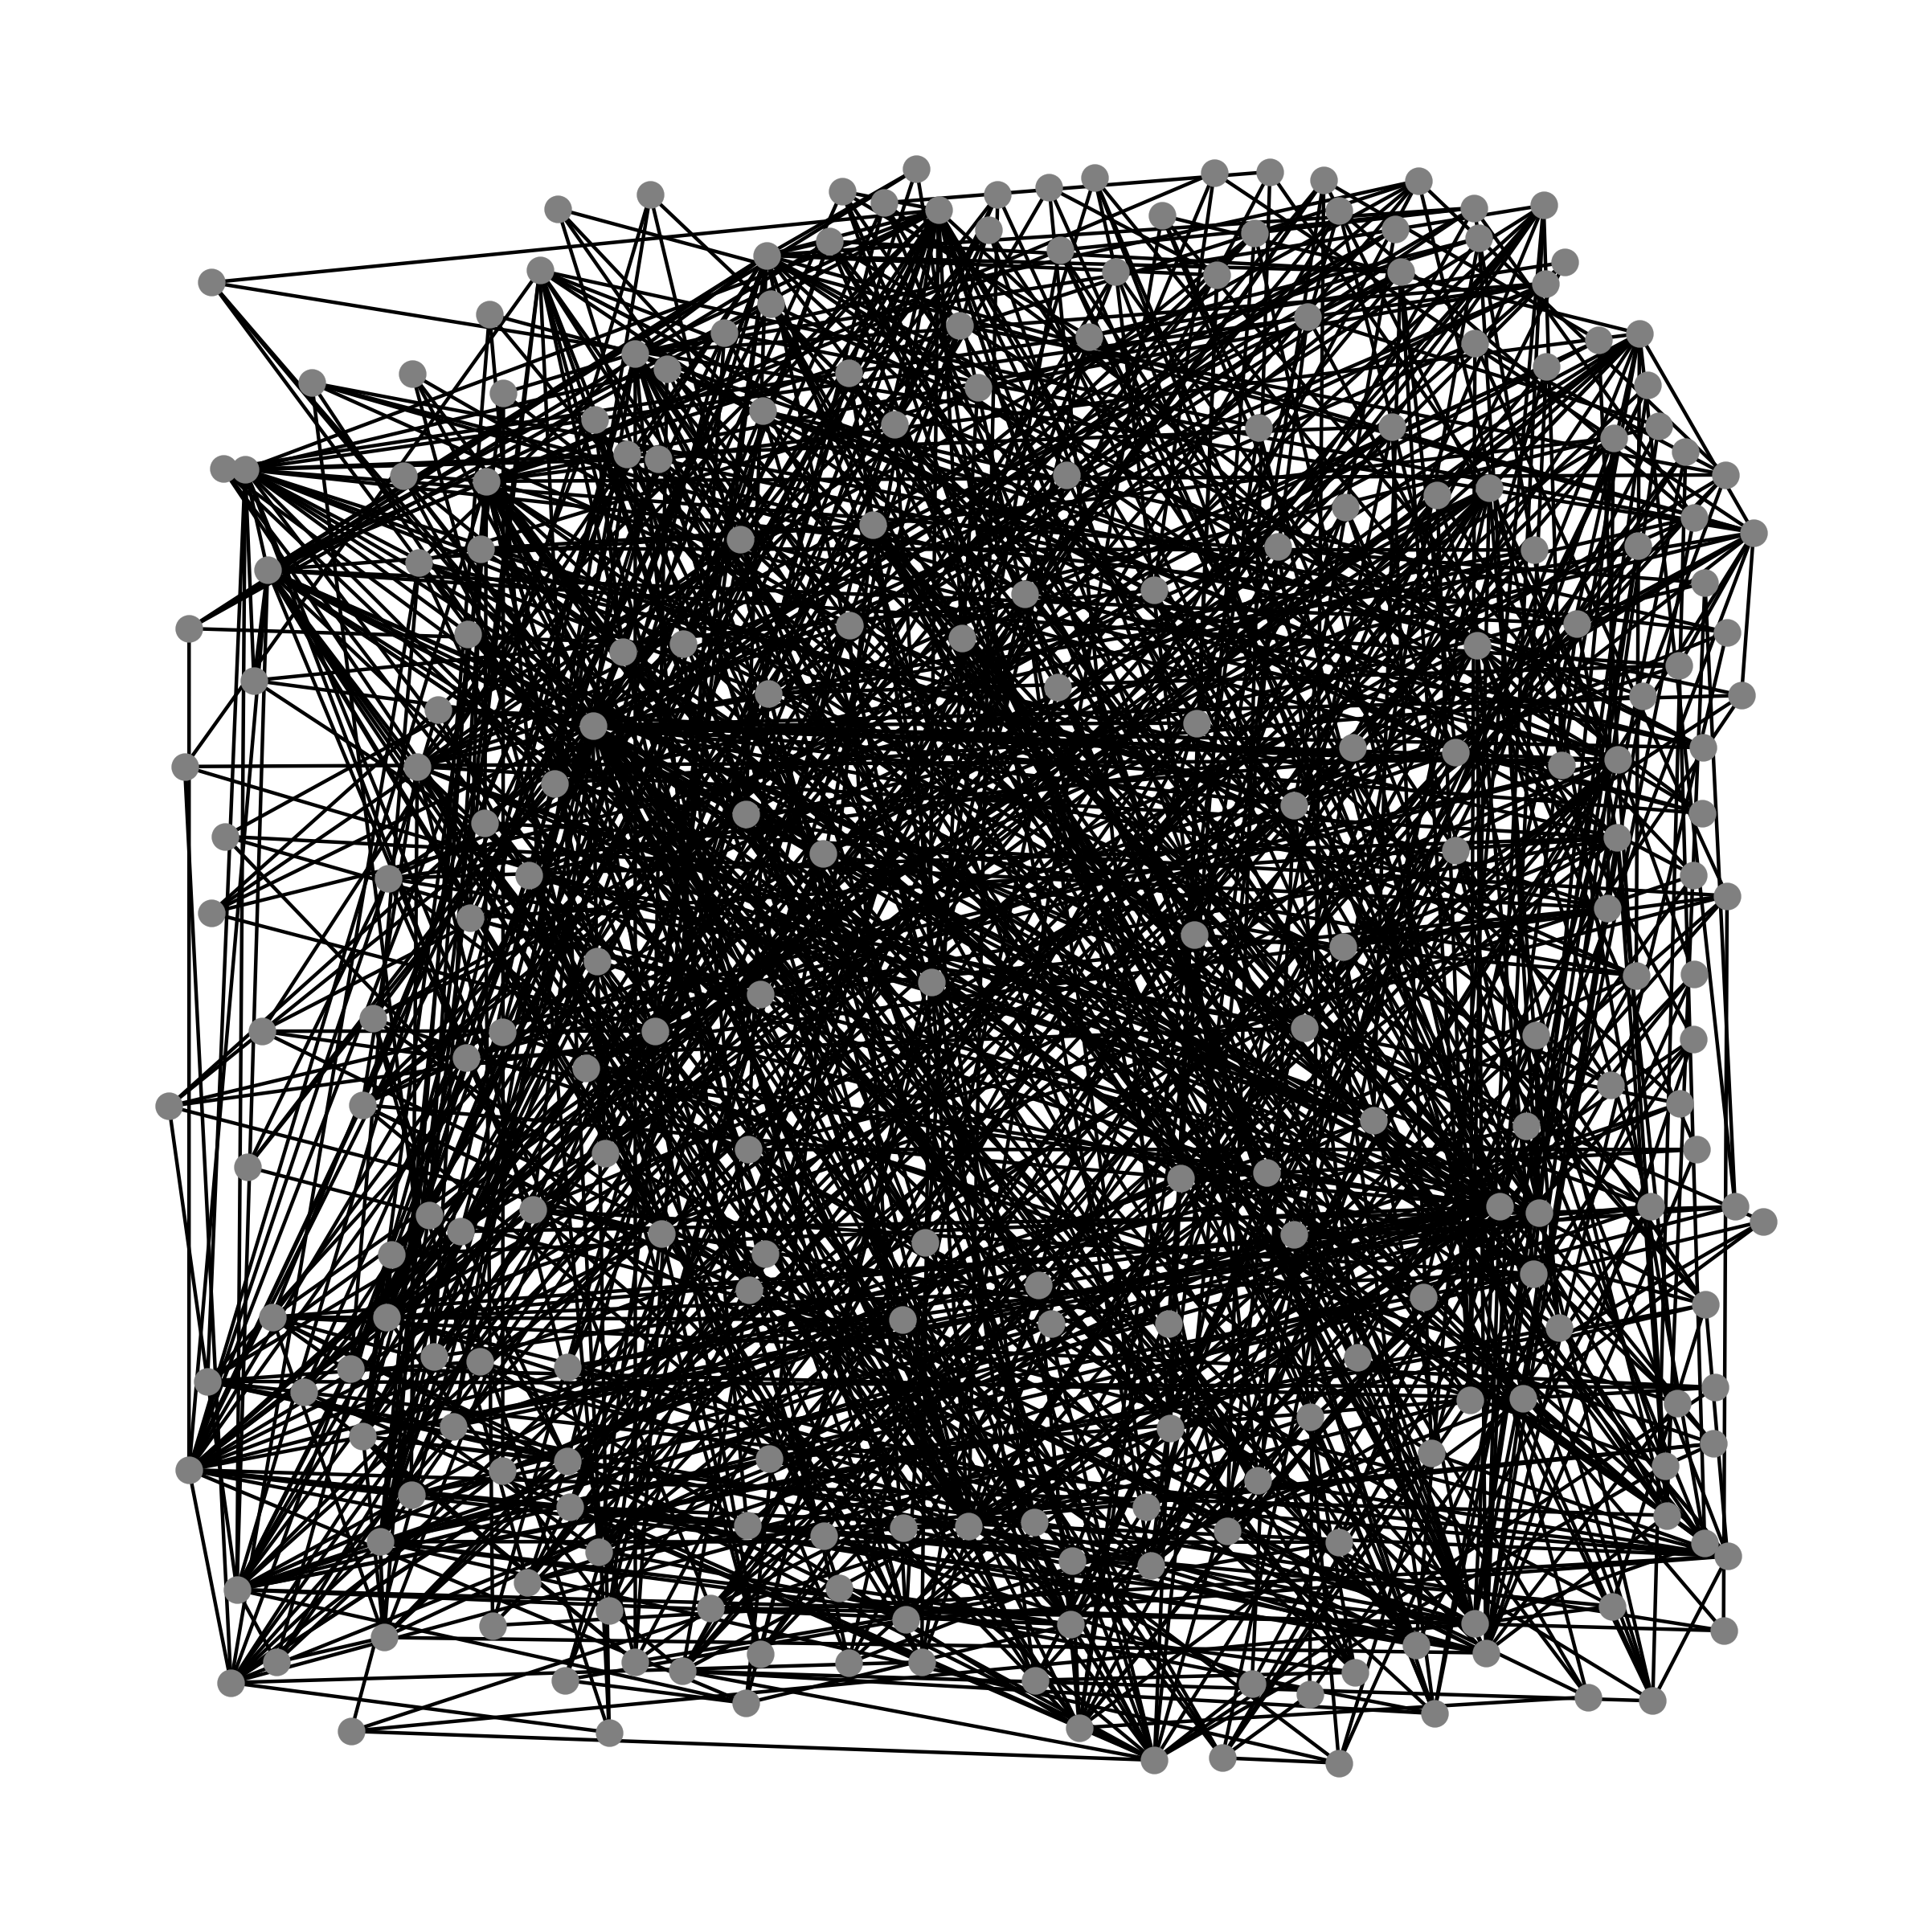

In [2]:
#nx.draw_spring(Graph)
fig = plt.figure(1, figsize=(120, 120), dpi=20)
pos = nx.spring_layout(Graph, k=5, iterations=2)
nx.draw(Graph, node_size=15000, node_color="grey", pos=pos, width = 16)

#nx.draw(Graph )

In [3]:
html_code ="""
<html>
  <head>
    <script type="text/javascript">
        graph = %s;
    </script>
  </head>
  <body>
      <div id="graph"></div>
  </body>
</html>""" % (j)
HTML(html_code)

In [11]:
%%javascript

require.config({paths: {d3: "//d3js.org/d3.v4.min",}});

require(["d3"], function(d3) {
    var width = 850,
    height = 850;
    var color = d3.scaleOrdinal(d3.schemeCategory10);

    var simulation = d3.forceSimulation()
        .force("link", d3.forceLink().id(function(d) { return d.name; }).distance(function(d) { return 1;5 }).strength(.05))
        .force("charge", d3.forceManyBody())
        .force("collide", d3.forceCollide(25))
        .force("center", d3.forceCenter(width /2, height /2));
    
    
    // append SVG to body of index.html with height and width specified above
    d3.select("div#graph").select("svg").remove();
    var svg = d3.select("div#graph").append("svg")
        .attr("width", width)
        .attr("height", height);

    // this actually adheres the data to the force base layout and starts the layout


    var link = svg.selectAll(".link").data(graph.links)
        .enter().append("line")
        .attr("class", "link")
        .style("stroke", "#999")
        .style("stroke-width", "1.2px");

    // append the nodes with specified data and style properties
    var node = svg.selectAll(".node").data(graph.nodes)
        .enter().append("circle")
        .attr("class", "node")
        .attr("r", 5)
        .style("stroke", "#fff")
        .style("stroke-width", "1.5px")
        //.style("fill", "steelblue")
        .style("fill", "gray" )
      .call(d3.drag()
          .on("start", dragstarted) 
          .on("drag", dragged)
          .on("end", dragended));
    // attach titles to nodes, so when the mouse hovers over the nodes it projects the name
    node.append("title")
        .text(function(d) { return d.name; });
    
    simulation
        .nodes(graph.nodes)
        .on("tick", ticked);

   simulation.force("link")
        .links(graph.links);    
    // this is the main mechanism of the force based diagram
    // which moves the nodes and links from their starting and finishing positions
    // once it hits equilibrium, it will stop moving the positions
    function ticked() {
        link.attr("x1", function(d) { return d.source.x; })
            .attr("y1", function(d) { return d.source.y; })
            .attr("x2", function(d) { return d.target.x; })
            .attr("y2", function(d) { return d.target.y; });
        node.attr("cx", function(d) { return d.x; })
            .attr("cy", function(d) { return d.y; });
    };
    
    
    function dragstarted(d) {
        if (!d3.event.active) simulation.alphaTarget(0.3).restart();
        d.fx = d.x;
        d.fy = d.y;
    }

    function dragged(d) {
        d.fx = d3.event.x;
        d.fy = d3.event.y;
    }

    function dragended(d) {
        if (!d3.event.active) simulation.alphaTarget(0);
        d.fx = null;
        d.fy = null;
    }
    

});

<IPython.core.display.Javascript object>

In [12]:
html_code ="""
<html>
  <head>
    <script type="text/javascript">
        graph = %s;
    </script>
  </head>
  <body>
      <div id="graph"></div>
  </body>
</html>""" % (j)
HTML(html_code)

## TODO Jan 15  For SUKI
* Schedule to 2022 ( list of benchmarks)
* Small network samples (manually created)

## how to represent relationship?
1. For folders: pretty straight forward : root -> subfolder
2. for flat files, if text, tf-idf --> for that you need to extract text and do keyword extraction && || n-gram

In [15]:
import os
data_folder = 'C:\\Users\\ituki\\Documents\\Projects\\Graph_Vis\\data'
os.chdir(data_folder)


In [16]:
import pdfplumber
FILE = '.\\inception.pdf'
pdf = pdfplumber.open(FILE)
#print(pdf.pages)
page = pdf.pages[1]
text = page.extract_text()
print(text)

In this paper, we will focus on an efﬁcient deep neural network architecture for computer vision,
codenamedInception,whichderivesitsnamefromtheNetworkinnetworkpaperbyLinetal[12]
in conjunction with the famous “we need to go deeper” internet meme [1]. In our case, the word
“deep”isusedintwodifferentmeanings: ﬁrstofall,inthesensethatweintroduceanewlevelof
organization in the form of the “Inception module” and also in the more direct sense of increased
network depth. In general, one can view the Inception model as a logical culmination of [12]
while taking inspiration and guidance from the theoretical work by Arora et al [2]. The beneﬁts
of the architecture are experimentally veriﬁed on the ILSVRC 2014 classiﬁcation and detection
challenges,onwhichitsigniﬁcantlyoutperformsthecurrentstateoftheart.
2 RelatedWork
Starting with LeNet-5 [10], convolutional neural networks (CNN) have typically had a standard
structure – stacked convolutional layers (optionally followed by contrast normalization

In [17]:
pdftotext = "C:\\Users\\ituki\\Documents\\Projects\\xpdf-tools-win-4.03\\bin64\\pdftotext"
FILE = '.\\inception.pdf'
command = "pdftotext" + " " + FILE
os.system(command)


0

In [20]:
# Example to run CMD in pyhon 
#data = 'C:\\Users\\ituki\\Do\\Graph_Vis\\data\\'
command = "FOR /R %%f IN (*.pdf) DO echo %%f"
os.system(command)

1

In [19]:
# bash
"for /r %f in (*.pdf) do call pdftotext  %f "

'for /r %f in (*.pdf) do call pdftotext  %f '

In [ ]:
# renaming files with " " (space) replacing with "_" (uderscore)
import re
rootdir = 'C:\\Users\\ituki\\Documents\\Projects\\Graph_Vis\\data\\'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        new_file = re.sub(" ", "_", file)
        new_file = re.sub(",", "", new_file)
        new_file = re.sub("-", "", new_file)
        if new_file != file:
            os.rename(file, new_file)
        #os.system(command)
        #print(os.path.join(subdir, file))

# Keyword Extraction

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ituki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ituki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ituki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# How to extrac text from a Web page

In [23]:
res = []
import trafilatura
url = "https://www.economist.com/business/2022/01/15/remote-work-and-the-importance-of-writing"
html = trafilatura.fetch_url(url)
text = trafilatura.extract(html)
text_clean = text.replace("\n", " ").replace("\'", "")
res.append(text_clean[0:5000])

In [26]:
res[0][:200]

'THE PANDEMIC has given a big shove to all forms of digital communication. Video-conferencing platforms have become verbs. Venture capitalists make their bets after watching virtual pitches. Products l'

In [63]:
text_file = ".\\text\\TestRank_mihalcea.emnlp04..txt"
with open(text_file, 'r') as f:
    lines = f.read()
clean_lines = lines.replace("\n", " ").replace("\'", "")
#re.sub("\n", " ", lines)
res.append(clean_lines[:5000])

In [46]:
res = []
for i, filename in enumerate(os.listdir("text")):
    if filename.endswith(".txt"):
        text_file = os.path.join(".\\text", filename)
        print(i+1, text_file)
        with open(text_file, 'r') as f:
            lines = f.read()
        clean_lines = lines.replace("\n", " ").replace("\'", "")
        res.append(clean_lines[3000:8000])
        continue
    else:
        continue

1 .\text\(UNITEXT_88)_Shair_Ahmad_Antonio_Ambrosetti_(auth.)A_Textbook_on_Ordinary_Differential_EquationsSpringer_International_Publishing_(2015).txt
2 .\text\2009_Book_ComputationalStatistics.txt
3 .\text\Algorithms_and_Complexity_Herbert_Wilf.txt
4 .\text\Algorithms_on_Strings_Trees_and_Sequences_[Gusfield_19970528].txt
5 .\text\Algorithms__Sanjoy_Dasgupta_Christos_H._Papadimitriou_and_Umesh_V._Vazirani.txt
6 .\text\Algorithm_Design.txt
7 .\text\alppaydin_machinelearning_2010.txt
8 .\text\bandit_algo.txt
9 .\text\Bioinformatics_algorithms._Vol.1_an_active_learning_approach_by_Compeau_Phillip_Pevzner_Pavel_(zlib.org).txt
10 .\text\chopra05.txt
11 .\text\Data_Structure_and_Programing_Techniques_in_C.txt
12 .\text\Geof_H._Givens__Jennifer_A._Hoeting(auth.)__Comp.txt
13 .\text\hadsellchopralecun06_DrLIM.txt
14 .\text\inception.txt
15 .\text\Introduction_to_Linear_Regression_Analys.txt
16 .\text\Intro_to_Algorithm_Cormen.txt
17 .\text\lm.txt
18 .\text\matrix_cookbook.txt
19 .\text\Maxime_

In [47]:
res[0]

'this to lead to the more general equations. The concepts of initial values and existence and uniqueness of solutions are introduced early in this chapter. Ample examples, using simple integration, are provided to motivate and demonstrate these concepts. Almost all of the assertions are proved in elementary and simple terms. The important concepts of the Cauchy problem and the existence and uniqueness of solutions are covered in detail and demonstrated by many examples. Proofs are given in an Appendix. There is also a rigorous treatment of some qualitative behavior of solutions. This chapter is important from a pedagogical point of view because it introduces students to rigor and fosters an understanding of important concepts at an early stage. In a chapter on nonlinear first-order equations, students will learn how to explicitly solve certain types of equations, such as separable, homogeneous, exact, Bernoulli and Clairaut equations. Further chapters are devoted to linear higher order

In [56]:
# a func to get a text from a pdf
File_name = '.\\text\\TextRank.txt'
def get_text_from_txt(File_name):
        with open(File_name, 'r') as f:
            lines = f.read()
        clean_lines = lines.replace("\n", " ").replace("\'", "")
        return clean_lines
TextRank = get_text_from_txt(File_name)
TextRank_Words = TextRank.split(sep=" ")


['TextRank:',
 'Bringing',
 'Order',
 'into',
 'Texts',
 'Rada',
 'Mihalcea',
 'and',
 'Paul',
 'Tarau']

# TF-IDF

In [ ]:
from itertools import islice
from tqdm import tqdm
from re import sub
num_lines = sum(1 for line in open("wiki_tfidf_terms.csv", 'r', encoding='utf-8'))
with open("wiki_tfidf_terms.csv", encoding='utf-8') as file:
    dict_idf = {}
    with tqdm(total=num_lines) as pbar:
        for i, line in tqdm(islice(enumerate(file), 1, None)):
            try: 
                cells = line.split(",")
                idf = float(sub("[^0-9.]", "", cells[3]))
                dict_idf[cells[0]] = idf
            except: 
                print("Error on: " + line)
            finally:
                pbar.update(1)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from numpy import array, log
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform([x.lower() for x in res])
tf = tf.toarray()
tf = log(tf + 1)

In [27]:
tfidf = tf.copy()
words = array(vectorizer.get_feature_names_out())
for k in tqdm(dict_idf.keys()):
    if k in words:
        tfidf[:, words == k] = tfidf[:, words == k] * dict_idf[k]
    pbar.update(1)

100%|██████████| 10099022/10099022 [12:33<00:00, 13408.38it/s]


In [32]:
for j in range(tfidf.shape[0]):
    print("Keywords of article", str(j+1), words[tfidf[j, :].argsort()[-7:][::-1]])

Keywords of article 1 ['equations' 'shair' 'ptp' 'maghsoudi' 'www' 'solutions' 'springer']
Keywords of article 2 ['xtx' 'computational' 'numerical' 'springer' 'statistical' 'xty'
 'statistics']
Keywords of article 3 ['pseudoprimality' 'algorithms' 'primality' 'fulkerson' 'recursive'
 'backtracking' 'chapter']
Keywords of article 4 ['suffix' 'substring' 'ultrametric' 'alignments' 'exercises' 'matching'
 'alignment']
Keywords of article 5 ['graphs' 'exercises' 'dags' 'shortest' 'paths' 'algorithms'
 'multiplication']
Keywords of article 6 ['tardos' 'kleinberg' 'exercises' 'algorithms' 'algorithm' 'graphs'
 'graph']
Keywords of article 7 ['multivariate' 'nonparametric' 'perceptrons' 'estimator' 'regression'
 'clustering' 'exercises']
Keywords of article 8 ['bibliographic' 'exp3' 'bandits' 'stochastic' 'remarks' 'exercises'
 'minimax']
Keywords of article 9 ['compeau' 'pevzner' 'replication' 'dnaa' 'chapter' 'messages'
 'mismatches']
Keywords of article 10 ['discriminative' 'discriminative

# TextRank

In [70]:
# Try just one
from summa import keywords
keywd = keywords.keywords(TextRank, words=5)
keywd.split("\n")

['textrank',
 'graph',
 'texts',
 'text',
 'keyword',
 'keywords',
 'graphs extracted',
 'extraction',
 'extractive',
 'extract',
 'extracting']

In [49]:
from summa import keywords
for j in range(len(res)):
    print("Keywords of article", str(j+1), "\n", (keywords.keywords(res[j], words=10)).split("\n"))

Keywords of article 1 
 ['students', 'equations', 'uniqueness', 'simple', 'solutions', 'preface', 'ambrosetti', 'weiming', 'san', 'theory']
Keywords of article 2 
 ['chapter', 'chapters', 'important', 'computational', 'computing', 'computations', 'compute', 'methods', 'level', 'higher', 'addresses', 'addressed', 'data', 'carlo', 'functions', 'function']
Keywords of article 3 
 ['algorithm', 'algorithms', 'students', 'student', 'chapter', 'tests', 'test', 'problems', 'numerical', 'primality testing', 'graph', 'write', 'writing', 'backtracking']
Keywords of article 4 
 ['apl', 'exercises', 'strings', 'tree', 'trees', 'mapping', 'maps', 'map', 'sequence', 'sequencing', 'string matching', 'dna', 'algorithm', 'algorithmic', 'genome']
Keywords of article 5 
 ['exercises', 'algorithms', 'algorithm', 'search', 'quantum', 'shortest', 'programming', 'twos', 'ch', 'vazirani', 'number', 'numbers']
Keywords of article 6 
 ['problems', 'problem', 'graphs', 'graph', 'algorithms', 'algorithmic', 'algo

# TopicRank

In [42]:
# from pytopicrank import TopicRank
# for j in range(len(res)):
#     tr = TopicRank(res[j])
#     print("Keywords of article", str(j+1), "\n", tr.get_top_n(n=5, extract_strategy='first'))
from topicrankpy import extractinformation as t
t.extract_all('.\text\inception.txt',no_of_phrases) 

ModuleNotFoundError: No module named 'topicrankpy'

# YAKE

In [105]:
#testing on one (short)
from yake import KeywordExtractor
kw_extractor = KeywordExtractor(lan="en", n=1, top=10)
text = summary
keywords = kw_extractor.extract_keywords(text=summary)
keywords = [x for x, y in keywords]
keywords

Warning! Exception: 'list' object has no attribute 'replace' generated by the following text: '[TextRank: Bringing Order into Texts Rada Mihalcea and Paul Tarau Department of Computer Science ¡ University of North Texas rada,tarau @cs.unt.edu  Abstract In this paper, we introduce TextRank ­ a graph-based ranking model for text processing, and show how this model can be successfully used in natural language applications., Applying a similar line of thinking to lexical or semantic graphs extracted from natural language documents, results in a graph-based ranking model that can be applied to a variety of natural language processing applications, where knowledge drawn from an entire text is used in making local ranking/selection decisions., The TextRank Model  Graph-based ranking algorithms are essentially a  way of deciding the importance of a vertex within  a graph, based on global information recursively  drawn from the entire graph.,  Error rate  Convergence curves (250 vertices, 250 e

[]

In [100]:
from yake import KeywordExtractor
Yake_kw_extractor = KeywordExtractor(lan="en", n=2, top=10)
for j in range(len(res)):
    keywords = Yake_kw_extractor.extract_keywords(text=res[j])
    keywords = [x for x, y in keywords]
    print("Keywords of article", str(j+1), "\n", keywords)

Keywords of article 1 
 ['solutions', 'equations', 'existence', 'chapter', 'students', 'concepts', 'uniqueness', 'Ahmad Antonio', 'Antonio Ambrosetti', 'Antonio']
Keywords of article 2 
 ['Part', 'chapter', 'computational statistics', 'data', 'computational', 'Part III', 'Monte Carlo', 'Computer numbers', 'numbers', 'methods']
Keywords of article 3 
 ['Chapter', 'Algorithms', 'book', 'students', 'material', 'recursive', 'Algorithm', 'Backtracking', 'Factoring', 'TEX']
Keywords of article 4 
 ['suffix tree', 'linear-time suffix', 'Generalized suffix', 'Physical mapping', 'multiple alignment', 'tree algorithm', 'suffix', 'Longest common', 'set matching', 'exact set']
Keywords of article 5 
 ['Exercises', 'Shortest paths', 'Shortest', 'paths', 'algorithms', 'Quantum', 'problems', 'Search', 'programming', 'Periodicity']
Keywords of article 6 
 ['Solved Exercises', 'Exercises', 'Solved', 'Notes', 'problems', 'Shortest Paths', 'Algorithm', 'Computer Science', 'Reading', 'Matching Problem']
K

# KeyBERT

In [74]:
from keybert import KeyBERT
kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')

keywords = kw_extractor.extract_keywords(TextRank, stop_words='english')
keywords

[('graphbased', 0.3069),
 ('algorithms', 0.2653),
 ('efi2bna3ecdefto8', 0.244),
 ('matlab', 0.2209),
 ('graphs', 0.2158)]

In [54]:
from keybert import KeyBERT
kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')
for j in range(len(res)):
    keywords = kw_extractor.extract_keywords(res[j], stop_words='english')
    print("Keywords of article", str(j+1), "\n", keywords)

Keywords of article 1 
 [('mathematics', 0.4161), ('mathematical', 0.4075), ('theorems', 0.3952), ('algebra', 0.3933), ('calculus', 0.3891)]
Keywords of article 2 
 [('mathematics', 0.2767), ('algorithms', 0.2516), ('mathematical', 0.2514), ('algebra', 0.2493), ('arithmetic', 0.2426)]
Keywords of article 3 
 [('algorithms', 0.4824), ('70', 0.4737), ('mpm', 0.466), ('brualdi', 0.4523), ('72', 0.4515)]
Keywords of article 4 
 [('bioinformatics', 0.2922), ('algorithmic', 0.2658), ('algorithm', 0.2593), ('genome', 0.2314), ('fingerprinting', 0.2061)]
Keywords of article 5 
 [('shortest', 0.5604), ('333', 0.5146), ('329', 0.5032), ('randomized', 0.5023), ('exhaustive', 0.4986)]
Keywords of article 6 
 [('professor', 0.3656), ('internet', 0.349), ('algorithms', 0.3199), ('university', 0.2931), ('biology', 0.2891)]
Keywords of article 7 
 [('275', 0.3482), ('106', 0.3443), ('256', 0.3404), ('84', 0.3346), ('135', 0.3309)]
Keywords of article 8 
 [('170', 0.2027), ('333', 0.1817), ('329', 0.17

# Spacy

In [76]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [81]:
extra_words=list(STOP_WORDS)+list(punctuation)+['\n']
nlp=spacy.load('en_core_web_sm')
doc = TextRank
docx = nlp(doc)

In [85]:
all_words=[word.text for word in docx]
Freq_word={}
for w in all_words:
      w1=w.lower()
      if w1 not in extra_words and w1.isalpha():
          if w1 in Freq_word.keys():
              Freq_word[w1]+=1
          else:
              Freq_word[w1]=1

In [90]:
val=sorted(Freq_word.values())
max_freq=val[-10:]
print("Topic of document given :-")
for word,freq in Freq_word.items():
      if freq in max_freq:
          print(word ,end=" ")
      else:
          continue
for word in Freq_word.keys():
       Freq_word[word] = (Freq_word[word]/max_freq[-1])

Topic of document given :-
textrank graph based ranking text keyword extraction vertex set units words keywords 

In [108]:
sent_strength={}
for sent in docx.sents:
      for word in sent :
            if word.text.lower() in Freq_word.keys():
                 if sent in sent_strength.keys():
                     sent_strength[sent]+=Freq_word[word.text.lower()]
                 else:
                     sent_strength[sent]=Freq_word[word.text.lower()]
            else: 
                continue

top_sentences=(sorted(sent_strength.values())[::-1])
#top10percent_sentence=int(0.1*len(top_sentences))
n_sent = 10
top_sent=top_sentences[:n_sent+1]

summary = ""
for sent,strength in sent_strength.items():
        if strength in top_sent:
            summary+=str(sent)
        else:
            continue

# for i in summary:
#     print(i,end="")
print(summary)

TextRank: Bringing Order into Texts Rada Mihalcea and Paul Tarau Department of Computer Science ¡ University of North Texas rada,tarau @cs.unt.edu  Abstract In this paper, we introduce TextRank ­ a graph-based ranking model for text processing, and show how this model can be successfully used in natural language applications.Applying a similar line of thinking to lexical or semantic graphs extracted from natural language documents, results in a graph-based ranking model that can be applied to a variety of natural language processing applications, where knowledge drawn from an entire text is used in making local ranking/selection decisions.The TextRank Model  Graph-based ranking algorithms are essentially a  way of deciding the importance of a vertex within  a graph, based on global information recursively  drawn from the entire graph. Error rate  Convergence curves (250 vertices, 250 edges)  0.18 undirected/unweighted  0.16  undirected/weighted directed/unweighted  0.14  directed/weigh

In [109]:
# testing just summary with Yake
keywords = Yake_kw_extractor.extract_keywords(text=summary)
keywords = [x for x, y in keywords]
keywords

['Bringing Order',
 'Computer Science',
 'Rada Mihalcea',
 'Paul Tarau',
 'Tarau Department',
 'North Texas',
 'graph-based ranking',
 'ranking model',
 'Texas rada,tarau',
 'natural language']

1. Topic Modeling
2. Summarization
3. keyword Exraction (from the file name and the contents)
4. NER

What I wanna do is to map concepts between texts (articles, books, etc...)
Need to get similarity, commonarity, relatedness.... (edges)
- How to quantify edges? 
    - keywords extraction
    - summerization
    - term frequency => the more common words it has the closer. the more oftem the common words appear the closer
    - vectorize - test embedding + similarity score (cosine)
    -> bidirectional? Yes.
    
